In [38]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
url = 'https://github.com/SofiyaLyn/Thesis/raw/main/cleaned_data.csv'
cleaned_data = pd.read_csv(url)
cleaned_data.head()

,Year,Country,"Proceeds_Amount_+_Over_Sold_This_Market_(USD,_mln)",IPO_market_share,New_Business,IPOs_Number_of_Issues,P/E_Ratio,E/P_ratio,Stock_Market_Index,Interest_rate_up_to_1_mln,...,Aver_interest_rate_to_nonfinance,Real_GDP_Growth_(%),Nominal_GDP_($B),Population_(M),Population_Growth_(%),GDP_Per_Capita_($),Real_Private_Consumption_Growth_(%),Real_Government_Consumption_Growth_(%),Real_Gross_Fixed_Investment_Growth_(%),Industrial_Production_Growth_(%)
0,2009,Hungary,0,0,42046,1,15,7,21227,0,...,0,-3,52,7,0,6961,-4,0,-15,-20
1,2010,Hungary,179,64,44269,4,12,8,21327,9,...,8,1,50,7,0,6825,1,6,-19,14
2,2011,Hungary,0,0,52217,1,10,9,16974,9,...,8,2,57,7,0,7817,2,0,-3,17
3,2012,Hungary,2,1,32311,1,12,8,18173,10,...,9,0,54,7,0,7403,2,0,2,2
4,2013,Hungary,1,0,28207,1,10,9,18564,8,...,8,0,55,7,0,7655,-3,2,0,0


In [40]:
cleaned_data.columns = cleaned_data.columns.str.replace('(', '_').str.replace(')', '').str.replace('%', 'Percent').str.replace('$', 'Dollar')

In [41]:
cleaned_data['treated'] = cleaned_data['Country'].isin(["Hungary", "Poland", "Slovakia", "Czech Republic", "Slovenia", "Bulgaria", "Romania", "Estonia", "Latvia", "Lithuania"])
cleaned_data['treated'] = cleaned_data['treated'].astype(int)

cleaned_data['post_intervention'] = (cleaned_data['Year'] >= 2015).astype(int)
cleaned_data['treated_intervention'] = cleaned_data['treated'] * cleaned_data['post_intervention']


print(cleaned_data.columns)

Index(['Year', 'Country', 'Proceeds_Amount_+_Over_Sold_This_Market__USD,_mln',
       'IPO_market_share', 'New_Business', 'IPOs_Number_of_Issues',
       'P/E_Ratio', 'E/P_ratio', 'Stock_Market_Index',
       'Interest_rate_up_to_1_mln', 'Interest_rate_over_€1M',
       'Aver_interest_rate_to_nonfinance', 'Real_GDP_Growth__Percent',
       'Nominal_GDP__DollarB', 'Population__M', 'Population_Growth__Percent',
       'GDP_Per_Capita__Dollar', 'Real_Private_Consumption_Growth__Percent',
       'Real_Government_Consumption_Growth__Percent',
       'Real_Gross_Fixed_Investment_Growth__Percent',
       'Industrial_Production_Growth__Percent', 'treated', 'post_intervention',
       'treated_intervention'],
      dtype='object')


In [42]:
formula = 'IPOs_Number_of_Issues ~ treated + post_intervention + treated_intervention'
model = smf.ols(formula, data=cleaned_data).fit()
print(model.summary())



                              OLS Regression Results                             
Dep. Variable:     IPOs_Number_of_Issues   R-squared:                       0.013
Model:                               OLS   Adj. R-squared:                  0.000
Method:                    Least Squares   F-statistic:                     1.031
Date:                   Sat, 11 May 2024   Prob (F-statistic):              0.380
Time:                           14:31:04   Log-Likelihood:                -934.94
No. Observations:                    238   AIC:                             1878.
Df Residuals:                        234   BIC:                             1892.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
In

## Plotting a diff-in-diff graph

In [43]:
grouped_data = cleaned_data.groupby(['Year', 'treated']).agg({'IPOs_Number_of_Issues': 'mean'}).reset_index()

In [44]:
sns.set(style="whitegrid")

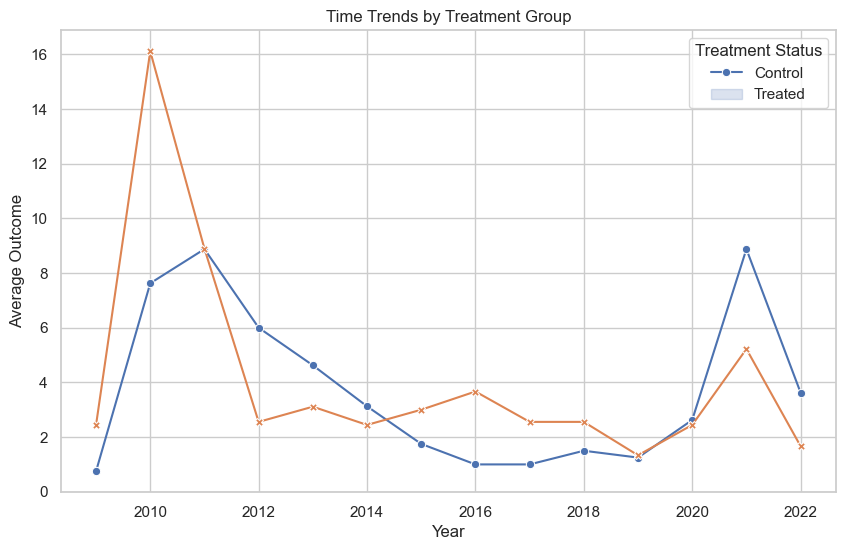

In [45]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='Year', y='IPOs_Number_of_Issues', hue='treated', style='treated', markers=True, dashes=False)

# Adding labels and title
plt.title('Time Trends by Treatment Group')
plt.xlabel('Year')
plt.ylabel('Average Outcome')
plt.legend(title='Treatment Status', labels=['Control', 'Treated'])

# Show the plot
plt.show()

In [46]:
Y = cleaned_data['IPOs_Number_of_Issues']  # replace
X = cleaned_data[['treated', 'post_intervention', 'treated_intervention']]
X = sm.add_constant(X)


                              OLS Regression Results                             
Dep. Variable:     IPOs_Number_of_Issues   R-squared:                       0.013
Model:                               OLS   Adj. R-squared:                  0.000
Method:                    Least Squares   F-statistic:                     1.031
Date:                   Sat, 11 May 2024   Prob (F-statistic):              0.380
Time:                           14:31:18   Log-Likelihood:                -934.94
No. Observations:                    238   AIC:                             1878.
Df Residuals:                        234   BIC:                             1892.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

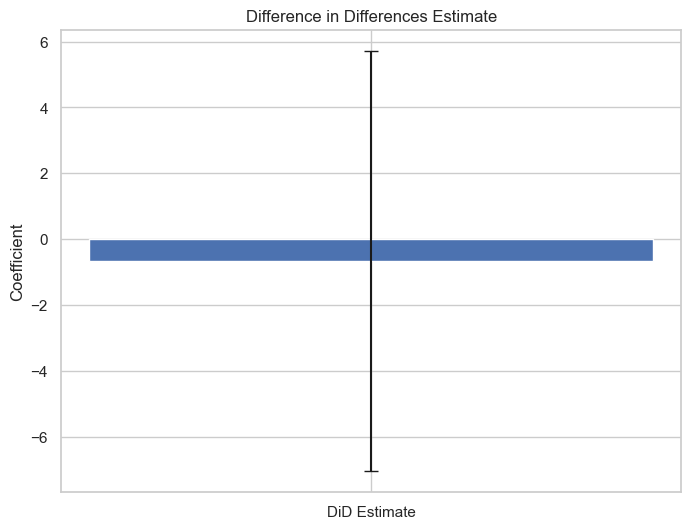

In [47]:
model = sm.OLS(Y, X)
results = model.fit()

# Print the summary
print(results.summary())

# Plot the coefficient of the interaction term
coef = results.params['treated_intervention']
se = results.bse['treated_intervention']  # standard error of the estimate
ci = 1.96 * se  # 95% confidence interval estimate

plt.figure(figsize=(8, 6))
plt.bar(['DiD Estimate'], [coef], yerr=[ci], capsize=5)
plt.ylabel('Coefficient')
plt.title('Difference in Differences Estimate')
plt.show()

#### Considering Control Variables: Population_Growth + GDP_Per_Capita + Real_Private_Consumption_Growth + Real_Government_Consumption_Growth + Real_Gross_Fixed_Investment_Growth + Industrial_Production_Growth + intercept


In [50]:
cleaned_data['intercept'] = 1
formula = """
IPOs_Number_of_Issues ~ treated + post_intervention + treated_intervention + Population_Growth__Percent + GDP_Per_Capita__Dollar + Real_Private_Consumption_Growth__Percent + Real_Government_Consumption_Growth__Percent + Real_Gross_Fixed_Investment_Growth__Percent + Industrial_Production_Growth__Percent + intercept"""
model = smf.ols(formula, data=cleaned_data).fit()
results_controlled = smf.ols(formula, data=cleaned_data).fit()
print(results_controlled.summary())
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     IPOs_Number_of_Issues   R-squared:                       0.092
Model:                               OLS   Adj. R-squared:                  0.056
Method:                    Least Squares   F-statistic:                     2.559
Date:                   Sat, 11 May 2024   Prob (F-statistic):            0.00805
Time:                           14:32:56   Log-Likelihood:                -925.05
No. Observations:                    238   AIC:                             1870.
Df Residuals:                        228   BIC:                             1905.
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [56]:
# This will display the variables that the model expects
print("Variables used in the model:", results_controlled.model.exog_names)


Variables used in the model: ['Intercept', 'treated', 'post_intervention', 'treated_intervention', 'Population_Growth__Percent', 'GDP_Per_Capita__Dollar', 'Real_Private_Consumption_Growth__Percent', 'Real_Government_Consumption_Growth__Percent', 'Real_Gross_Fixed_Investment_Growth__Percent', 'Industrial_Production_Growth__Percent', 'intercept']


In [59]:
predict_data = cleaned_data[['Year', 'treated', 'post_intervention', 'treated_intervention',
                             'Population_Growth__Percent', 'GDP_Per_Capita__Dollar',
                             'Real_Private_Consumption_Growth__Percent',
                             'Real_Government_Consumption_Growth__Percent',
                             'Real_Gross_Fixed_Investment_Growth__Percent',
                             'Industrial_Production_Growth__Percent', 'intercept']]

In [61]:
predict_data['pred'] = results_controlled.predict(sm.add_constant(predict_data, has_constant='add'))

/var/folders/h1/_vx7lz596z5c_kynzkqz8l180000gn/T/ipykernel_8770/2941254142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['pred'] = results_controlled.predict(sm.add_constant(predict_data, has_constant='add'))


In [62]:
predict_data['pred'] = results_controlled.predict(predict_data)


/var/folders/h1/_vx7lz596z5c_kynzkqz8l180000gn/T/ipykernel_8770/2482522063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data['pred'] = results_controlled.predict(predict_data)


In [64]:
print(predict_data.columns)


Index(['Year', 'treated', 'post_intervention', 'treated_intervention',
       'Population_Growth__Percent', 'GDP_Per_Capita__Dollar',
       'Real_Private_Consumption_Growth__Percent',
       'Real_Government_Consumption_Growth__Percent',
       'Real_Gross_Fixed_Investment_Growth__Percent',
       'Industrial_Production_Growth__Percent', 'intercept', 'pred'],
      dtype='object')


In [65]:
grouped_predict = predict_data.groupby(['Year', 'treated', 'post_intervention']).agg({'pred': 'mean'}).reset_index()


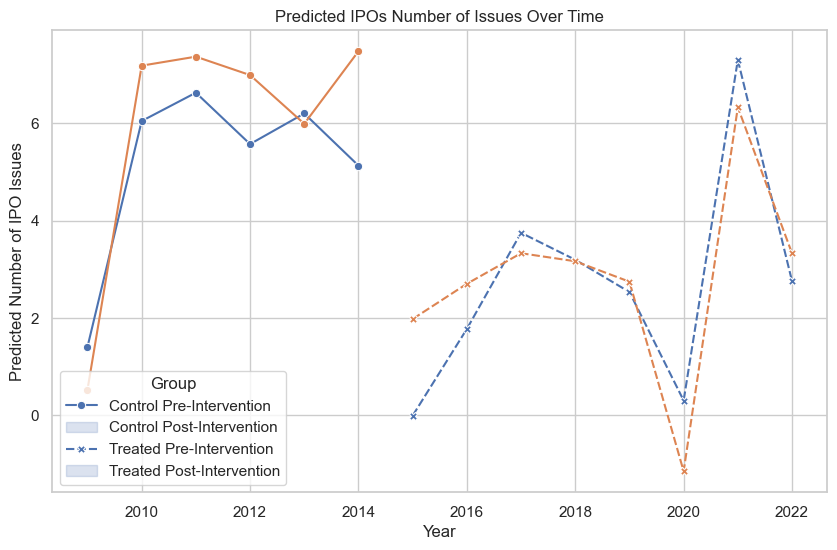

In [66]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_predict, x='Year', y='pred', hue='treated', style='post_intervention', markers=True)
plt.title('Predicted IPOs Number of Issues Over Time')
plt.xlabel('Year')
plt.ylabel('Predicted Number of IPO Issues')
plt.legend(title='Group', labels=['Control Pre-Intervention', 'Control Post-Intervention', 'Treated Pre-Intervention', 'Treated Post-Intervention'])
plt.show()

# With Intervention Year = 2017